<a href="https://colab.research.google.com/github/saebswaity/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales

- Author: Saeb Swaity



## Project Overview

This Colab Notebook is part of the "Prediction of Product Sales" project, aiming to ...



## Load and Inspect Data




In [29]:
# Loading Data
import pandas as pd

# Read the sales prediction data set into Google Colab
df = pd.read_csv("/content/sales_predictions_2023.csv")

# Preview the first rows of the data and summary of columns
print("Preview of the first rows of data:")
print(df.head())
print("\nSummary of DataFrame's columns:")
print(df.info())

Preview of the first rows of data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       

## Clean Data




In [30]:
df_old = df.copy()

In [31]:
# Data Cleaning
print("\nData Cleaning:")

# 1) How many rows and columns?
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# 2) What are the datatypes of each variable?
print("\nDatatypes of each variable:")
print(df.dtypes)




Data Cleaning:
Number of rows: 8523
Number of columns: 12

Datatypes of each variable:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [32]:
df.duplicated().sum()


0

In [33]:
# 3) Are there duplicates? If so, drop any duplicates.
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"\nDropped {duplicates} duplicate rows.")
else :
  print("no dublicated found !")

no dublicated found !


In [34]:
# 4) Identify missing values.
print("\nIdentifying missing values:")
missing_values = df.isnull().sum()
print(missing_values)


Identifying missing values:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [35]:
# 5) Address the missing values by using a placeholder value.
print("\nAddressing missing values:")
# Assuming placeholder value for missing values in numerical columns is 0
df.fillna(0, inplace=True)


Addressing missing values:


In [36]:
# 6) Confirm that there are no missing values after addressing them.
print("\nConfirming no missing values:")
print(df.isnull().sum())


Confirming no missing values:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [37]:
# 7) Find and fix any inconsistent categories of data.
print("\nFixing inconsistent categories of data:")
# Iterate over each object column
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{column}':")
    print(df[column].value_counts())


Fixing inconsistent categories of data:

Unique values in column 'Item_Identifier':
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Unique values in column 'Item_Fat_Content':
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Unique values in column 'Item_Type':
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Unique values in colum

In [38]:
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].value_counts()
    num_unique_values = len(unique_values)

    print(f"\nColumn '{column}' has {num_unique_values} unique values.")



Column 'Item_Identifier' has 1559 unique values.

Column 'Item_Fat_Content' has 5 unique values.

Column 'Item_Type' has 16 unique values.

Column 'Outlet_Identifier' has 10 unique values.

Column 'Outlet_Size' has 4 unique values.

Column 'Outlet_Location_Type' has 3 unique values.

Column 'Outlet_Type' has 4 unique values.


In [39]:
# Replace '0' with placeholder value in the 'Outlet_Size' column
df['Outlet_Size'].replace(0, 'missing', inplace=True)

# Verify the changes
print("\nAfter replacing missing values:")
print(df['Outlet_Size'].value_counts())


After replacing missing values:
Medium     2793
missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


In [40]:
# The 'Item_Identifier' column is being deleted because it contains 1559 unique values,

df.drop(columns=['Item_Identifier'], inplace=True)

In [41]:
# Replace values in the 'item_Fat' column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

# Verify the changes
print(df['Item_Fat_Content'].value_counts())


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [42]:
# Verify the changes
print("\nDataFrame after deleting 'Item_Identifier' column:")
print(df.head())


DataFrame after deleting 'Item_Identifier' column:
   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998     missing   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0

In [43]:
# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

# Verify the changes
print("\nDataFrame after converting categorical columns to one-hot encoding:")
print(df_encoded.head())



DataFrame after converting categorical columns to one-hot encoding:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0          3735.1380                         1                         0   
1           443.4228                         0                         1   
2          2097.2700                         1                         0   
3           732.3800                         0                         1   
4           994.7052                         1                         0   

   Item_Type_Baking Goods  Item_Type_Brea

In [44]:
# Data Cleaning
print("\nData Cleaning:")

# 1) How many rows and columns?
num_rows, num_cols = df_encoded.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# 2) What are the datatypes of each variable?
print("\nDatatypes of each variable:")
print(df_encoded.dtypes)




Data Cleaning:
Number of rows: 8523
Number of columns: 44

Datatypes of each variable:
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type

## Exploratory Data Analysis




In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

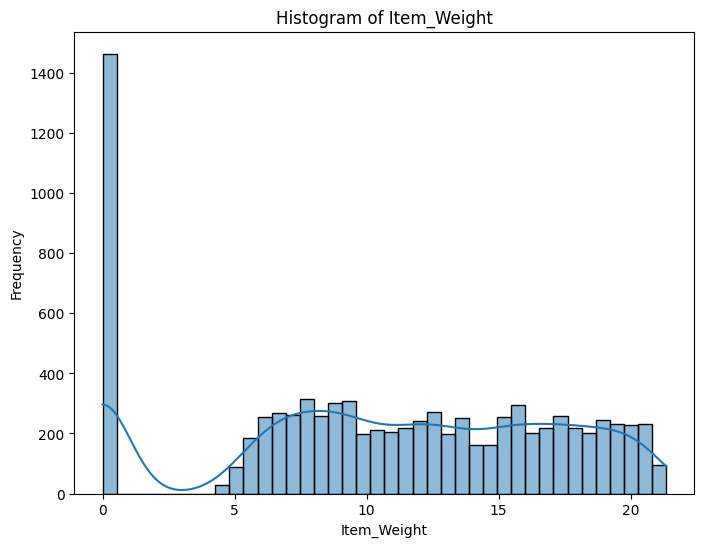

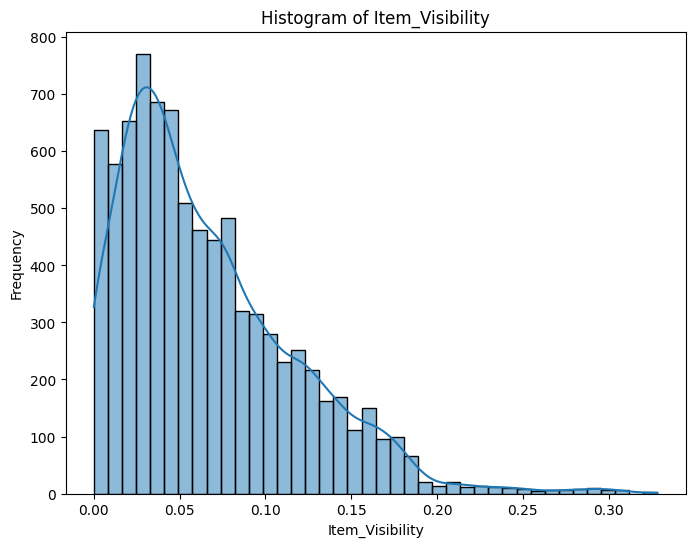

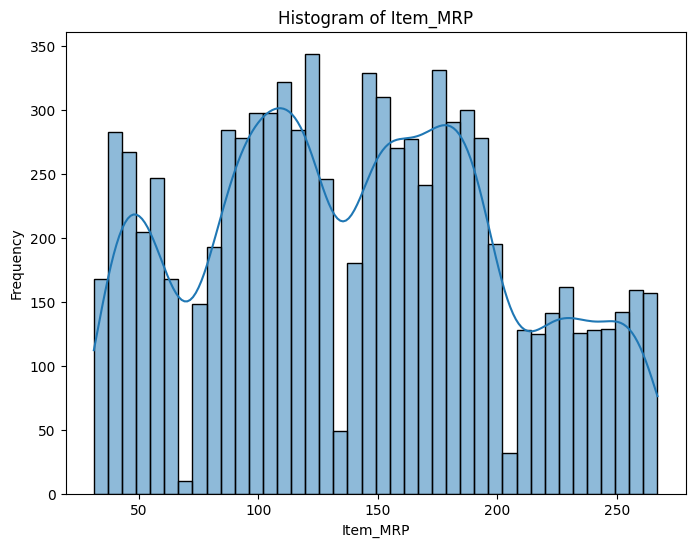

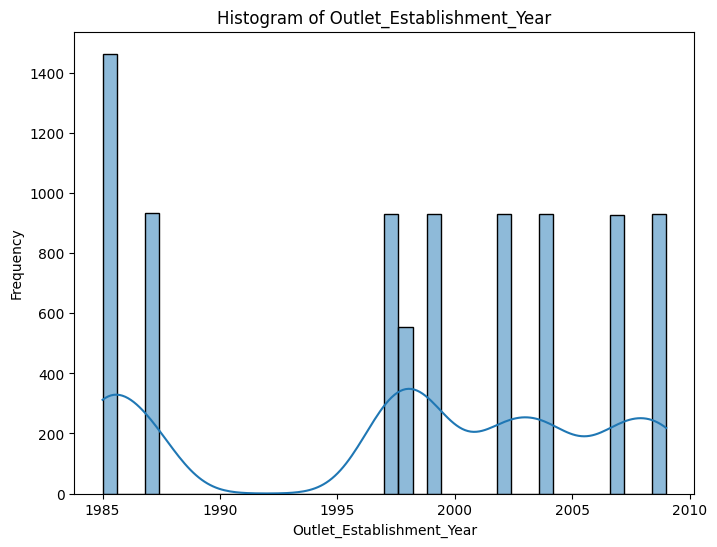

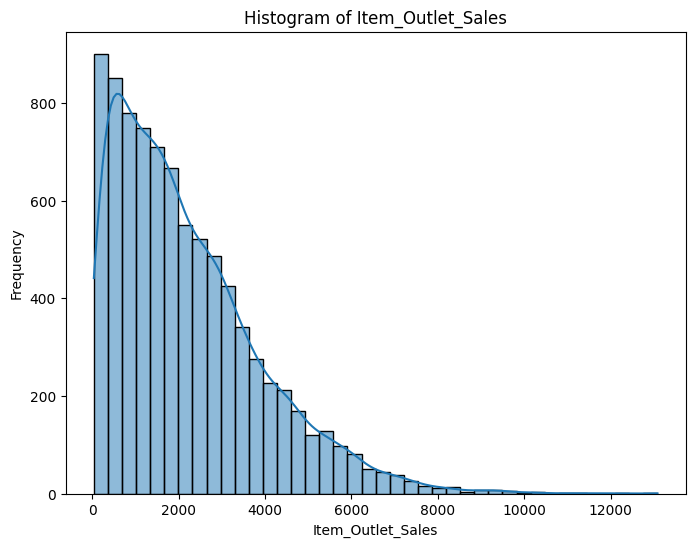

In [46]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot Histograms to view the distributions of numerical features in your dataset.
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, bins=40, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

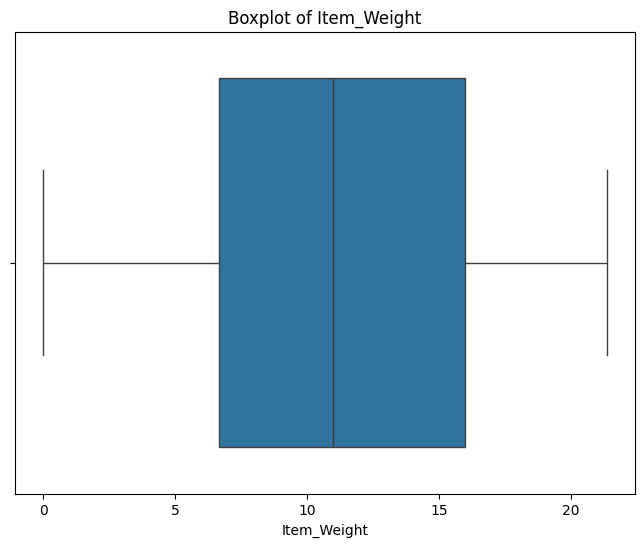

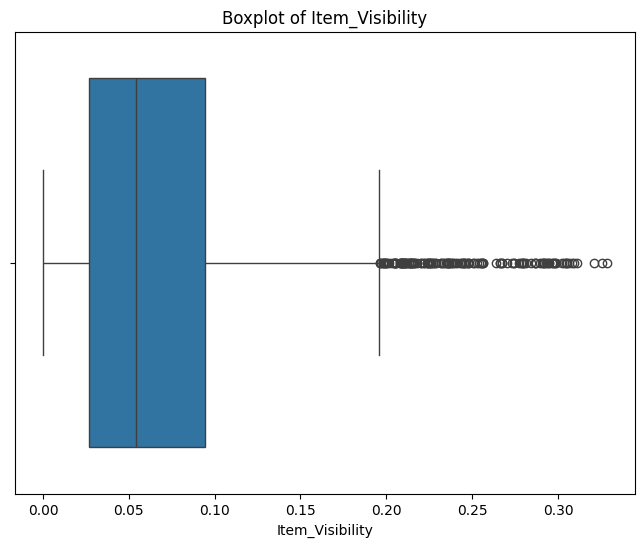

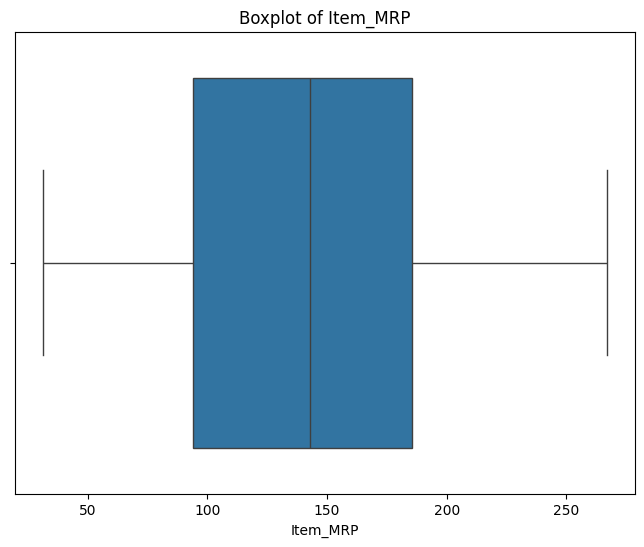

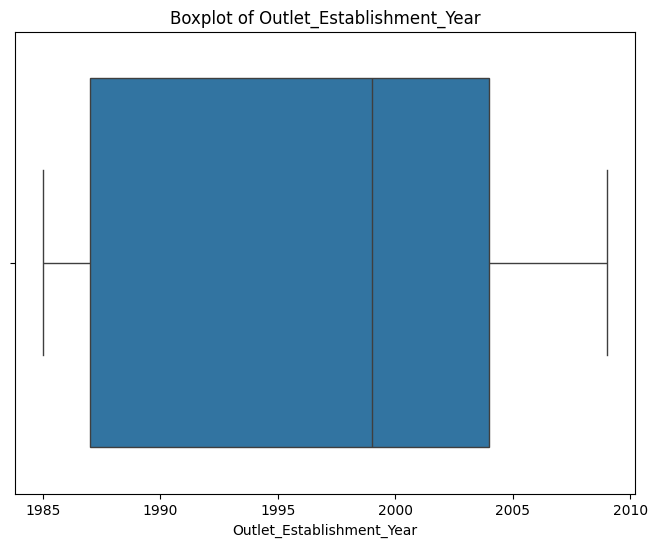

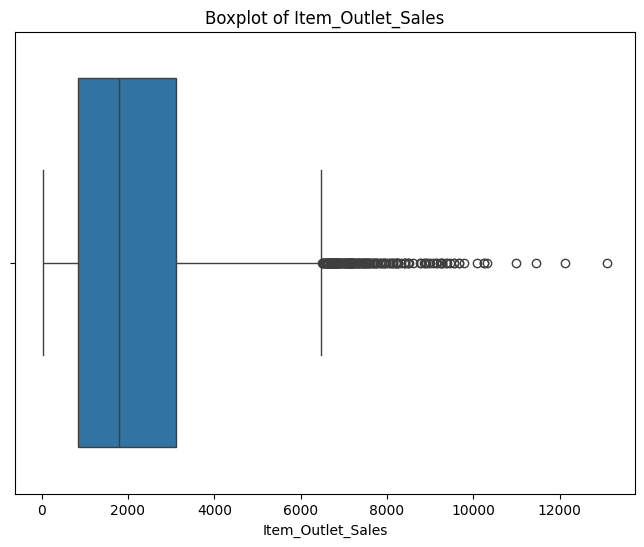

In [47]:


# Plot boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


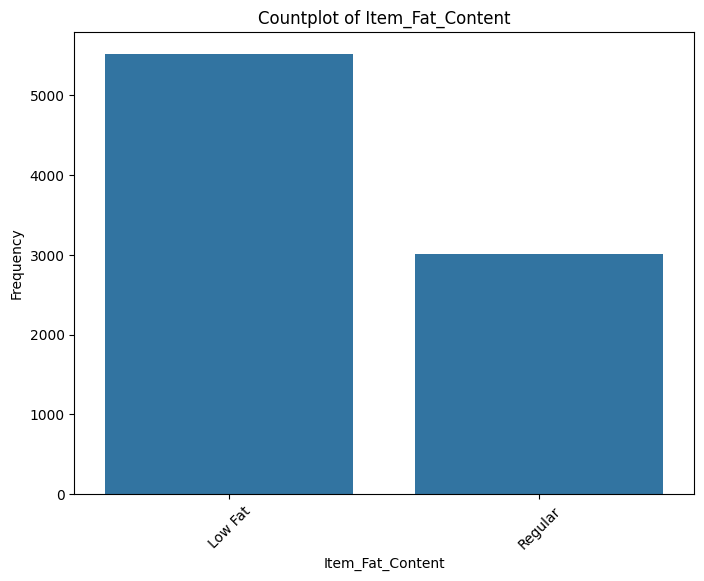

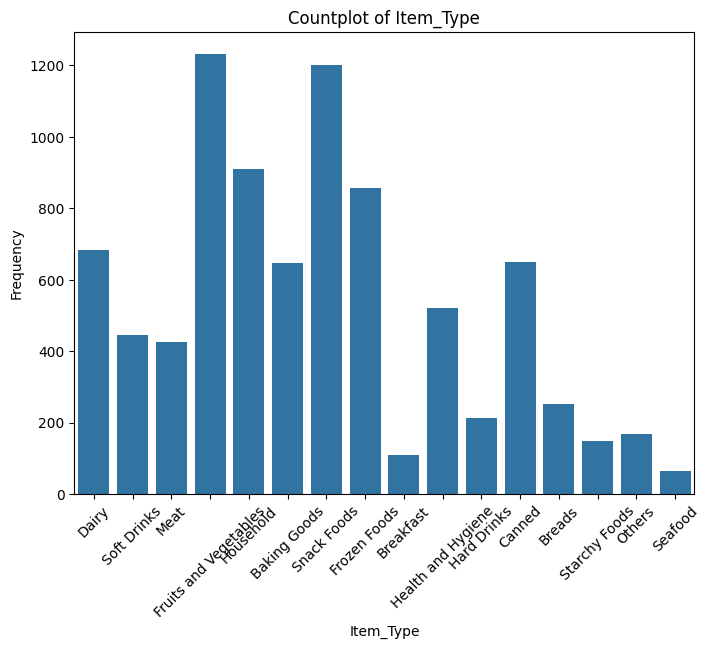

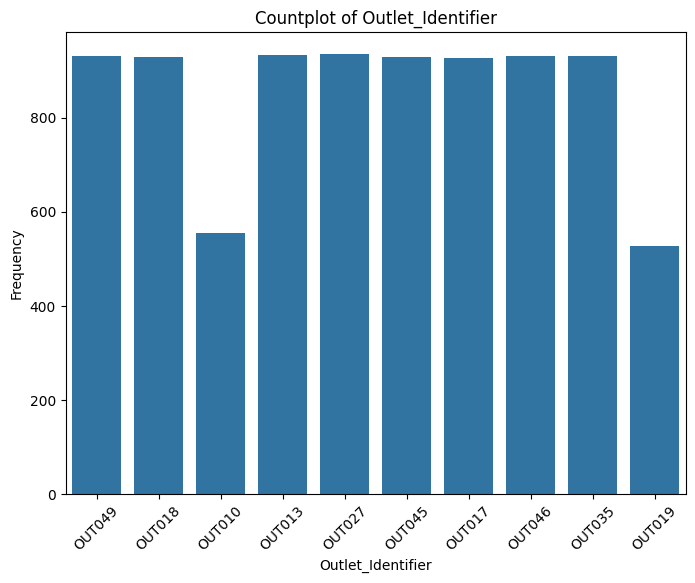

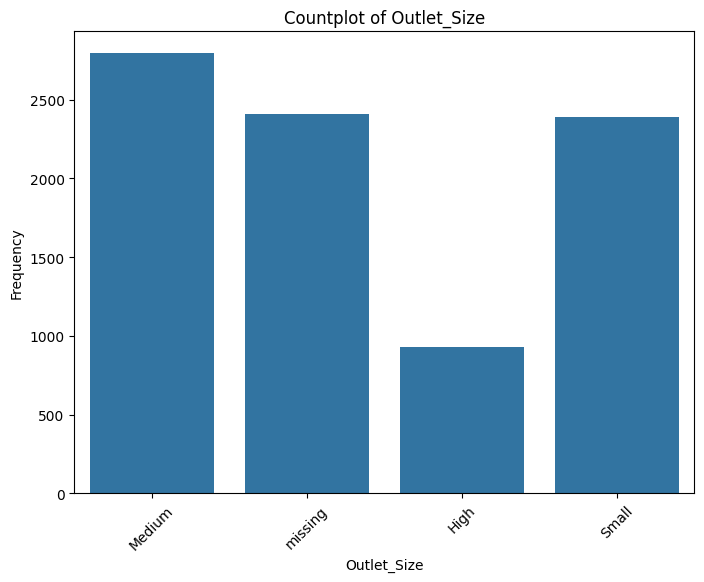

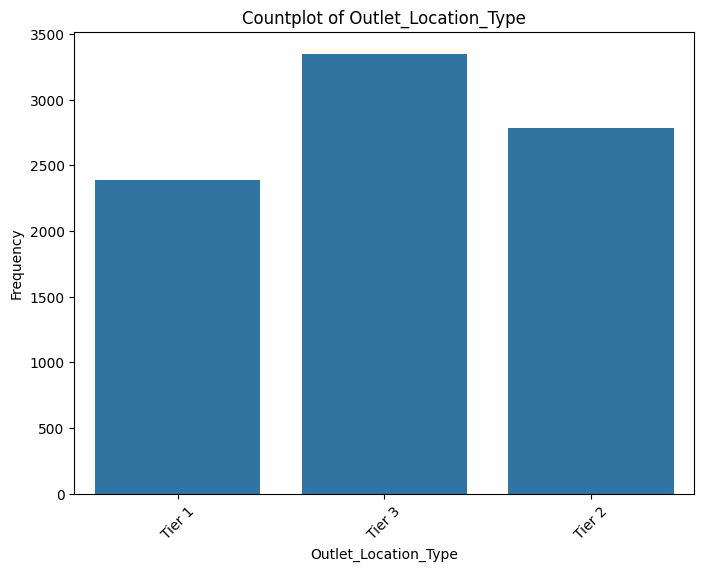

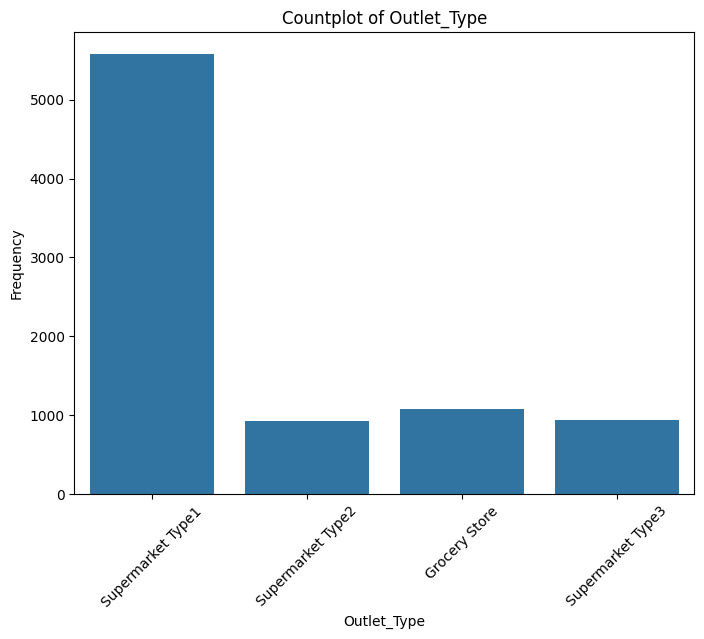

In [48]:
categorical_features = df.select_dtypes(include=['object']).columns

# Plot countplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

<ipython-input-49-17e4364fef98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


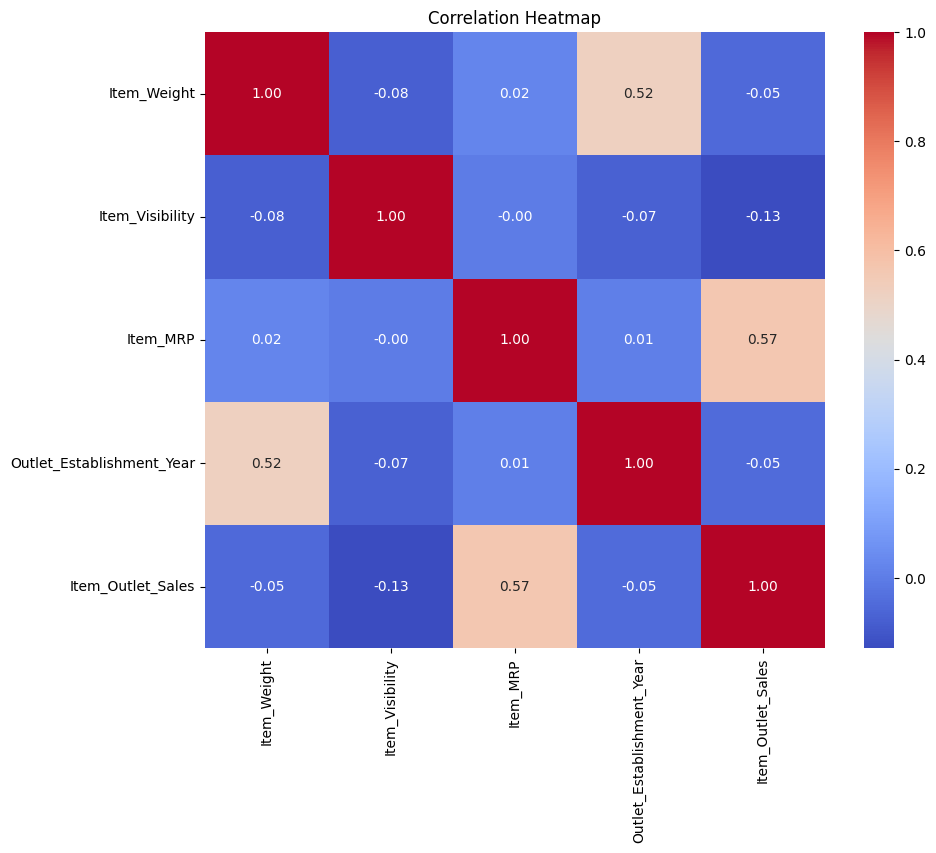

In [49]:
#Heatmap to view the correlation between features.
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Feature Inspection

